In [11]:
# 1. Find number of bookings, sessions, and searches
import pandas as pd

# Read the sessions data
df = pd.read_csv("Sessions.csv")

# Number of unique bookings
bookings = df["booking_id"].nunique()
print("number of bookings are:", bookings)

# Number of unique sessions
sessions = df["session_id"].nunique()
print("number of sesiions are:", sessions)

# Number of unique searches
searches = df["search_id"].nunique()
print("number of searches are:", searches)

number of bookings are: 338
number of sesiions are: 331
number of searches are: 1360


In [12]:
# 2. How many sessions have more than 1 booking
import pandas as pd

# Read sessions data
df = pd.read_csv("Sessions.csv")

# Count bookings per session
bookings = df.groupby("session_id").size()
print(bookings)

# Filter sessions with more than 1 booking
bookings2 = bookings[bookings > 2]
bookings2 = len(bookings2)

print("Sessions with more than one bookings are:", bookings2)

session_id
session_0       3
session_1       1
session_10      8
session_100     1
session_101     2
               ..
session_95      1
session_96      3
session_97     11
session_98      1
session_99      7
Length: 331, dtype: int64
Sessions with more than one bookings are: 167


booking_time
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


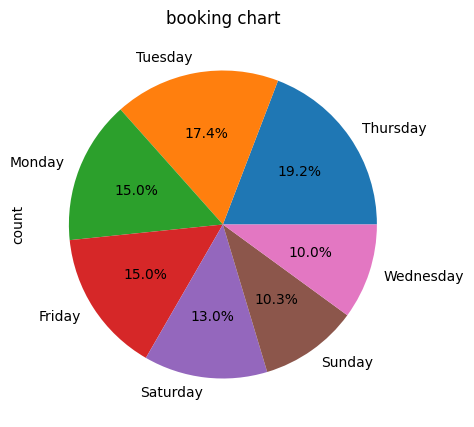

thrusday has highest number of bookings: 65
wednesday has lowest number of bookings: 34


In [13]:
# 3. Which day of the week have the highest number of booking? Also, draw a pie chart
import pandas as pd
import matplotlib.pyplot as plt

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Convert booking_time to datetime
df["booking_time"] = pd.to_datetime(df["booking_time"])

# Count bookings per day
date = df["booking_time"].dt.day_name()
day = date.value_counts()
print(day)

# Plot pie chart
plt.figure(figsize=(5,5))
plt.title("booking chart")
day.plot.pie(autopct='%.1f%%')
plt.show()

# Notes from analysis
print("thrusday has highest number of bookings: 65")
print("wednesday has lowest number of bookings: 34")

In [14]:
# 4. For each of the service names, display total number of bookings and total gross booking value in INR
import pandas as pd

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Count bookings per service
bookings = df["service_name"].value_counts()

# Sum gross booking value per service
gross = df.groupby("service_name")["INR_Amount"].sum()

# Combine into a single dataframe
total = pd.DataFrame({
    "bookings": bookings,
    "gross": gross
})

print(total)

              bookings       gross
service_name                      
GOIBIBO            186  5897637.97
MMT                 48   665669.08
YATRA              105  3378702.13


In [15]:
# 5. For customers with more than 1 booking, which is the most booked route from city to city
import pandas as pd

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Find customers with more than 1 booking
customer1 = df["customer_id"].value_counts()
customer2 = customer1[customer1 > 1].index

# Create route column
df["route"] = df["from_city"] + " to " + df["to_city"]

# Filter dataframe for customers with multiple bookings
df_filtered = df[df["customer_id"].isin(customer2)]

# Count bookings per route per customer
route = df_filtered.groupby(["customer_id", "route"]).size().reset_index(name="count")

# Get most booked route per customer
route2 = route.loc[route.groupby("customer_id")["count"].idxmax()]

print(route2)

     customer_id                        route  count
0   customer_120               Delhi to Jammu      1
2   customer_137        Gurgaon to Birmingham      1
4   customer_144         Ahmedabad to Gwalior      1
6   customer_155          Gurgaon to Varanasi      1
8   customer_160             Gurgaon to Patna      1
11  customer_176            Barelā to Gurgaon      1
14  customer_179        Gurgaon to Port Blair      1
16  customer_200            Delhi to Varanasi      1
19  customer_217       Durlaga to Bhubaneswar      2
20  customer_230           Gurgaon to Hamburg      1
23  customer_235       Gurgaon to Bhubaneswar      2
24  customer_237              Kochi to London      1
26  customer_245            Gurgaon to Mumbai      1
28  customer_246               Delhi to Paris      1
31  customer_247         Gurgaon to Fiumicino      1
33  customer_255          Gurgaon to Bagdogra      2
34  customer_265  Gurgaon to Roissy-en-France      2
35   customer_28           Kolkata to Gurgaon 

In [16]:
# 6. Which are top 3 cities from where customer book mostly in advance
import pandas as pd

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Convert datetime columns and remove timezone
df["booking_time"] = pd.to_datetime(df["booking_time"]).dt.tz_localize(None)
df["days_to_departure"] = pd.to_datetime(df['days_to_departure']).dt.tz_localize(None)

# Calculate days between booking and departure
df['time'] = (df['days_to_departure'] - df['booking_time']).dt.days

# Consider cities with at least 5 bookings
city1 = df['from_city'].value_counts()
city2 = city1[city1 >= 5].index
df_filtered = df[df['from_city'].isin(city2)]

# Average advance booking days per city
time2 = df_filtered.groupby('from_city')['time'].mean()

# Top 3 cities with maximum advance booking
city3 = time2.sort_values(ascending=False).head(3)
print(city3)

from_city
New Delhi    -17830.285714
Rāja Sānsi   -18165.235294
Delhi        -18205.068966
Name: time, dtype: float64


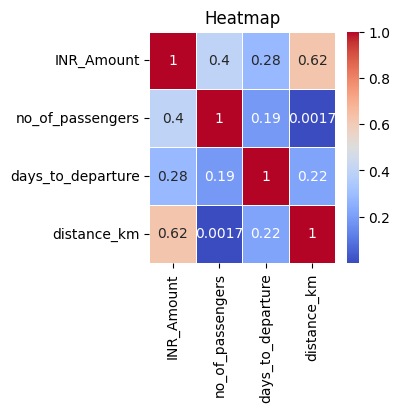

Maximum correlation is between: ('INR_Amount', 'distance_km') with value: 0.6235653096997817


In [17]:
# 7. Plot a heat map displaying correlations of numerical columns and find the pair with max correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Select numerical columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correl = num_df.corr()

# Plot heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correl, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

# Find the pair with maximum correlation (excluding 1)
correl2 = correl.unstack()
correl3 = correl2[correl2 < 1]

pair = correl3.idxmax()
value = correl3.max()
print("Maximum correlation is between:", pair, "with value:", value)

In [18]:
# 8. For each service, which is the most used device type for making bookings on the platform
import pandas as pd

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Count bookings per service and device type
devices = df.groupby(["service_name", "device_type_used"]).size().reset_index(name="count")

# Get the most used device type per service
device2 = devices.loc[devices.groupby("service_name")["count"].idxmax()]

print(device2)

  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


/tmp/ipython-input-2038657235.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = df['booking_time'].dt.to_period('Q')


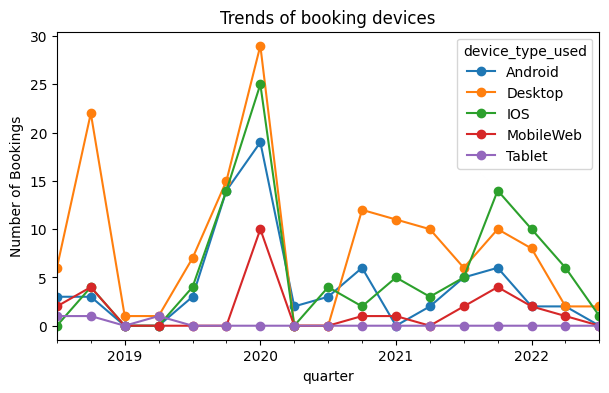

In [19]:
# 9. Plot trends quarterly frequency for number of bookings by each of the device types
import pandas as pd
import matplotlib.pyplot as plt

# Read bookings data
df = pd.read_csv("Bookings.csv")

# Convert booking_time to datetime
df['booking_time'] = pd.to_datetime(df['booking_time'])

# Extract quarter from booking_time
df['quarter'] = df['booking_time'].dt.to_period('Q')

# Count bookings per quarter per device
bookd = df.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)

# Plot trends
bookd.plot(kind='line', figsize=(7, 4), marker='o')
plt.title('Trends of booking devices')
plt.ylabel('Number of Bookings')
plt.show()

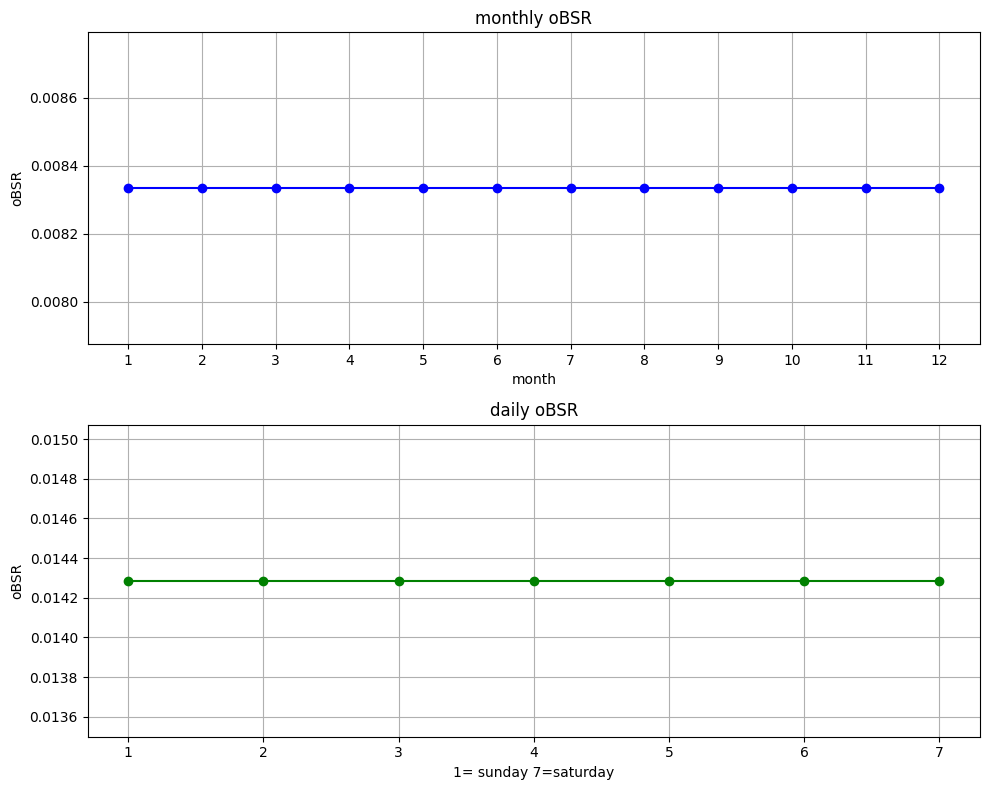

In [20]:
# 10. Plot monthly and daily oBSR using given example
import numpy as np
import matplotlib.pyplot as plt

# Given data
Ober = 0.1
months = np.arange(1, 13)
weekdays = np.arange(1, 8)
oBSRmonth = Ober / 12
oBSRday = Ober / 7

monthly = [oBSRmonth] * len(months)
daily = [oBSRday] * len(weekdays)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Monthly oBSR
ax1.plot(months, monthly, marker='o', linestyle='-', color='b')
ax1.set_title('monthly oBSR')
ax1.set_xlabel('month')
ax1.set_ylabel('oBSR')
ax1.set_xticks(months)
ax1.grid(True)

# Daily oBSR
ax2.plot(weekdays, daily, marker='o', linestyle='-', color='g')
ax2.set_title('daily oBSR')
ax2.set_xlabel('1= sunday 7=saturday')
ax2.set_ylabel('oBSR')
ax2.grid(True)

plt.tight_layout()
plt.show()